In [18]:
!pip install pandas


In [19]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('dataset.csv', encoding='cp1252')



In [20]:
print(df.columns)



Index(['Country', 'Human Development Index (HDI) ', 'HDI Group', 'HDI rank',
       'Life expectancy at birth (years)',
       'Expected years of schooling (years)',
       'Mean years of schooling (years)',
       'Gross national income (GNI) per capita (2017 PPP $)',
       'GNI per capita rank minus HDI rank', 'HDI rank 2018',
       'Change in HDI rank (2014-2019)', 'Inequality-adjusted HDI',
       'Gender Inequality Index',
       'Maternal mortality ratio (2017, deaths per 100,000 live births)',
       'Adolescent birth rate (2015-2020, births per 1,000 women ages 15–19)',
       'Share of seats in parliament (% held by women)',
       'Female population with at least some secondary education (2015-2019, % ages 25 and older)',
       'Male population with at least some secondary education (2015-2019, % ages 25 and older)',
       'Female labour force participation rate (% ages 15 and older)',
       'Male labour force participation rate (% ages 15 and older)',
       'Population

3

In [21]:
print(df[['Human Development Index (HDI) ',
          'Gender Inequality Index',
          'Life expectancy at birth (years)',
          'Population age 15-64 years (millions)',
          'Gross national income (GNI) per capita (2017 PPP $)']].dtypes)


Human Development Index (HDI)                          object
Gender Inequality Index                                object
Life expectancy at birth (years)                       object
Population age 15-64 years (millions)                  object
Gross national income (GNI) per capita (2017 PPP $)    object
dtype: object


In [22]:
# Convert columns to numeric, forcing errors to NaN
df['Human Development Index (HDI) '] = pd.to_numeric(df['Human Development Index (HDI) '], errors='coerce')
df['Gender Inequality Index'] = pd.to_numeric(df['Gender Inequality Index'], errors='coerce')
df['Life expectancy at birth (years)'] = pd.to_numeric(df['Life expectancy at birth (years)'], errors='coerce')
df['Population age 15-64 years (millions)'] = pd.to_numeric(df['Population age 15-64 years (millions)'], errors='coerce')
df['Gross national income (GNI) per capita (2017 PPP $)'] = pd.to_numeric(df['Gross national income (GNI) per capita (2017 PPP $)'], errors='coerce')


In [23]:
# Drop rows with NaN values
df = df.dropna(subset=['Human Development Index (HDI) ',
                       'Gender Inequality Index',
                       'Life expectancy at birth (years)',
                       'Population age 15-64 years (millions)',
                       'Gross national income (GNI) per capita (2017 PPP $)'])


In [24]:
# Define your independent variables with the correct column names
X = df[['Human Development Index (HDI) ',
        'Gender Inequality Index',
        'Life expectancy at birth (years)',
        'Population age 15-64 years (millions)']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)
# Define your dependent variable
y = df['Gross national income (GNI) per capita (2017 PPP $)']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                                             OLS Regression Results                                            
Dep. Variable:     Gross national income (GNI) per capita (2017 PPP $)   R-squared:                       0.684
Model:                                                             OLS   Adj. R-squared:                  0.676
Method:                                                  Least Squares   F-statistic:                     84.85
Date:                                                 Thu, 15 Aug 2024   Prob (F-statistic):           3.12e-38
Time:                                                         17:00:42   Log-Likelihood:                -1741.0
No. Observations:                                                  162   AIC:                             3492.
Df Residuals:                                                      157   BIC:                             3508.
Df Model:                                                            4                                  

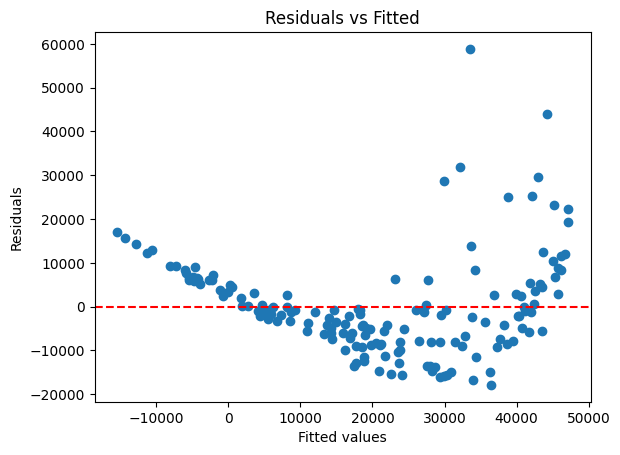

In [25]:
import matplotlib.pyplot as plt

plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


In [26]:
from statsmodels.stats.diagnostic import het_breuschpagan

test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, test)))


{'LM Statistic': 8.669127461722518, 'LM Test p-value': 0.06992328095234364, 'F-Statistic': 2.2191437851999827, 'F-Test p-value': 0.06935281133931234}


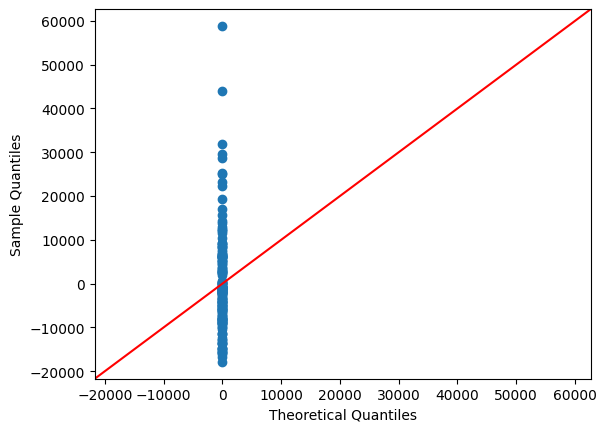

In [27]:
sm.qqplot(model.resid, line ='45')
plt.show()


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                                 feature         VIF
0                                  const  539.100071
1         Human Development Index (HDI)    10.658392
2                Gender Inequality Index    6.586116
3       Life expectancy at birth (years)    6.363189
4  Population age 15-64 years (millions)    1.005062


In [29]:
# Check the unique categories in the HDI Group column
hdi_groups = df['HDI Group'].unique()
print(hdi_groups)
print(f"Number of HDI categories: {len(hdi_groups)}")


['Very high' 'High' 'Medium' 'Low']
Number of HDI categories: 4


In [30]:
df['HDI Group'] = pd.Categorical(df['HDI Group'], categories=['Low', 'Medium', 'High', 'Very high'], ordered=True)

# Now create dummy variables, ensuring 'Low' is the reference category
df = pd.get_dummies(df, columns=['HDI Group'], drop_first=True)

# Check which dummy variables were created
print(df.columns)



Index(['Country', 'Human Development Index (HDI) ', 'HDI rank',
       'Life expectancy at birth (years)',
       'Expected years of schooling (years)',
       'Mean years of schooling (years)',
       'Gross national income (GNI) per capita (2017 PPP $)',
       'GNI per capita rank minus HDI rank', 'HDI rank 2018',
       'Change in HDI rank (2014-2019)', 'Inequality-adjusted HDI',
       'Gender Inequality Index',
       'Maternal mortality ratio (2017, deaths per 100,000 live births)',
       'Adolescent birth rate (2015-2020, births per 1,000 women ages 15–19)',
       'Share of seats in parliament (% held by women)',
       'Female population with at least some secondary education (2015-2019, % ages 25 and older)',
       'Male population with at least some secondary education (2015-2019, % ages 25 and older)',
       'Female labour force participation rate (% ages 15 and older)',
       'Male labour force participation rate (% ages 15 and older)',
       'Population (millions)',

In [31]:
# Check the data types of the columns
print(df[['Gender Inequality Index',
          'Life expectancy at birth (years)',
          'Population age 15-64 years (millions)',
          'HDI Group_Medium', 'HDI Group_High', 'HDI Group_Very high']].dtypes)



Gender Inequality Index                  float64
Life expectancy at birth (years)         float64
Population age 15-64 years (millions)    float64
HDI Group_Medium                            bool
HDI Group_High                              bool
HDI Group_Very high                         bool
dtype: object


In [32]:
# Convert the columns to numeric, forcing errors to NaN (which can then be handled)
df['Gender Inequality Index'] = pd.to_numeric(df['Gender Inequality Index'], errors='coerce')
df['Life expectancy at birth (years)'] = pd.to_numeric(df['Life expectancy at birth (years)'], errors='coerce')
df['Population age 15-64 years (millions)'] = pd.to_numeric(df['Population age 15-64 years (millions)'], errors='coerce')
# Convert boolean columns to numeric
df['HDI Group_Medium'] = df['HDI Group_Medium'].astype(int)
df['HDI Group_High'] = df['HDI Group_High'].astype(int)
df['HDI Group_Very high'] = df['HDI Group_Very high'].astype(int)



In [33]:
# Check the data types to ensure all are numeric
print(df[['Gender Inequality Index',
          'Life expectancy at birth (years)',
          'Population age 15-64 years (millions)',
          'HDI Group_Medium', 'HDI Group_High', 'HDI Group_Very high']].dtypes)


Gender Inequality Index                  float64
Life expectancy at birth (years)         float64
Population age 15-64 years (millions)    float64
HDI Group_Medium                           int64
HDI Group_High                             int64
HDI Group_Very high                        int64
dtype: object


In [34]:
# Drop rows with NaN values
df = df.dropna(subset=['Gender Inequality Index',
                       'Life expectancy at birth (years)',
                       'Population age 15-64 years (millions)',
                       'HDI Group_Medium', 'HDI Group_High', 'HDI Group_Very high'])


In [35]:
# Define your independent variables
X = df[['Gender Inequality Index',
        'Life expectancy at birth (years)',
        'Population age 15-64 years (millions)',
        'HDI Group_Medium', 'HDI Group_High', 'HDI Group_Very high']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define your dependent variable
y = df['Gross national income (GNI) per capita (2017 PPP $)']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                                             OLS Regression Results                                            
Dep. Variable:     Gross national income (GNI) per capita (2017 PPP $)   R-squared:                       0.736
Model:                                                             OLS   Adj. R-squared:                  0.726
Method:                                                  Least Squares   F-statistic:                     72.09
Date:                                                 Thu, 15 Aug 2024   Prob (F-statistic):           2.41e-42
Time:                                                         17:00:43   Log-Likelihood:                -1726.3
No. Observations:                                                  162   AIC:                             3467.
Df Residuals:                                                      155   BIC:                             3488.
Df Model:                                                            6                                  

In [40]:
df = pd.read_csv('dataset.csv', encoding='cp1252')


In [41]:
# Reorder the HDI Group to make 'Very High' the reference category
df['HDI Group'] = pd.Categorical(df['HDI Group'], categories=['Very high', 'Low', 'Medium', 'High'], ordered=True)

# Create dummy variables again, this time 'Very High' will be the reference category (and thus not included in the dummy variables)
df = pd.get_dummies(df, columns=['HDI Group'], drop_first=True)

# Check to see which columns were created
print(df.columns)


Index(['Country', 'Human Development Index (HDI) ', 'HDI rank',
       'Life expectancy at birth (years)',
       'Expected years of schooling (years)',
       'Mean years of schooling (years)',
       'Gross national income (GNI) per capita (2017 PPP $)',
       'GNI per capita rank minus HDI rank', 'HDI rank 2018',
       'Change in HDI rank (2014-2019)', 'Inequality-adjusted HDI',
       'Gender Inequality Index',
       'Maternal mortality ratio (2017, deaths per 100,000 live births)',
       'Adolescent birth rate (2015-2020, births per 1,000 women ages 15–19)',
       'Share of seats in parliament (% held by women)',
       'Female population with at least some secondary education (2015-2019, % ages 25 and older)',
       'Male population with at least some secondary education (2015-2019, % ages 25 and older)',
       'Female labour force participation rate (% ages 15 and older)',
       'Male labour force participation rate (% ages 15 and older)',
       'Population (millions)',

In [42]:
# Check the data types of all relevant columns
print(df[['Gender Inequality Index',
          'Life expectancy at birth (years)',
          'Population age 15-64 years (millions)',
          'HDI Group_Low', 'HDI Group_Medium', 'HDI Group_High',
          'Gross national income (GNI) per capita (2017 PPP $)']].dtypes)


Gender Inequality Index                                object
Life expectancy at birth (years)                       object
Population age 15-64 years (millions)                  object
HDI Group_Low                                            bool
HDI Group_Medium                                         bool
HDI Group_High                                           bool
Gross national income (GNI) per capita (2017 PPP $)    object
dtype: object


In [47]:
# Convert the columns to numeric, forcing errors to NaN (which can then be handled)
df['Gender Inequality Index'] = pd.to_numeric(df['Gender Inequality Index'], errors='coerce')
df['Life expectancy at birth (years)'] = pd.to_numeric(df['Life expectancy at birth (years)'], errors='coerce')
df['Population age 15-64 years (millions)'] = pd.to_numeric(df['Population age 15-64 years (millions)'], errors='coerce')
# Convert boolean columns to numeric
df['HDI Group_Medium'] = df['HDI Group_Medium'].astype(int)
df['HDI Group_High'] = df['HDI Group_High'].astype(int)
df['HDI Group_Low'] = df['HDI Group_Low'].astype(int)
df['Gross national income (GNI) per capita (2017 PPP $)'] = pd.to_numeric(df['Gross national income (GNI) per capita (2017 PPP $)'], errors='coerce')

In [48]:
# Drop rows with NaN values or handle them appropriately
df = df.dropna(subset=['Gender Inequality Index',
                       'Life expectancy at birth (years)',
                       'Population age 15-64 years (millions)',
                       'HDI Group_Low', 'HDI Group_Medium', 'HDI Group_High',
                       'Gross national income (GNI) per capita (2017 PPP $)'])


In [49]:
# Verify that all columns are now numeric
print(df[['Gender Inequality Index',
          'Life expectancy at birth (years)',
          'Population age 15-64 years (millions)',
          'HDI Group_Low', 'HDI Group_Medium', 'HDI Group_High',
          'Gross national income (GNI) per capita (2017 PPP $)']].dtypes)


Gender Inequality Index                                float64
Life expectancy at birth (years)                       float64
Population age 15-64 years (millions)                  float64
HDI Group_Low                                            int64
HDI Group_Medium                                         int64
HDI Group_High                                           int64
Gross national income (GNI) per capita (2017 PPP $)    float64
dtype: object


In [50]:
# Define your independent variables
X = df[['Gender Inequality Index',
        'Life expectancy at birth (years)',
        'Population age 15-64 years (millions)',
        'HDI Group_Low', 'HDI Group_Medium', 'HDI Group_High']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define your dependent variable
y = df['Gross national income (GNI) per capita (2017 PPP $)']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())



                                             OLS Regression Results                                            
Dep. Variable:     Gross national income (GNI) per capita (2017 PPP $)   R-squared:                       0.736
Model:                                                             OLS   Adj. R-squared:                  0.726
Method:                                                  Least Squares   F-statistic:                     72.09
Date:                                                 Thu, 15 Aug 2024   Prob (F-statistic):           2.41e-42
Time:                                                         17:12:17   Log-Likelihood:                -1726.3
No. Observations:                                                  162   AIC:                             3467.
Df Residuals:                                                      155   BIC:                             3488.
Df Model:                                                            6                                  

In [51]:
# Create interaction terms between HDI groups and GII
df['Interaction_Low_GII'] = df['HDI Group_Low'] * df['Gender Inequality Index']
df['Interaction_Medium_GII'] = df['HDI Group_Medium'] * df['Gender Inequality Index']
df['Interaction_High_GII'] = df['HDI Group_High'] * df['Gender Inequality Index']


In [52]:
# Define the independent variables including the interaction terms
X = df[['Gender Inequality Index',
        'Life expectancy at birth (years)',
        'Population age 15-64 years (millions)',
        'HDI Group_Low', 'HDI Group_Medium', 'HDI Group_High',
        'Interaction_Low_GII', 'Interaction_Medium_GII', 'Interaction_High_GII']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Gross national income (GNI) per capita (2017 PPP $)']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                                             OLS Regression Results                                            
Dep. Variable:     Gross national income (GNI) per capita (2017 PPP $)   R-squared:                       0.772
Model:                                                             OLS   Adj. R-squared:                  0.759
Method:                                                  Least Squares   F-statistic:                     57.34
Date:                                                 Thu, 15 Aug 2024   Prob (F-statistic):           2.04e-44
Time:                                                         17:35:01   Log-Likelihood:                -1714.4
No. Observations:                                                  162   AIC:                             3449.
Df Residuals:                                                      152   BIC:                             3480.
Df Model:                                                            9                                  